# Predictions of Influenza Cases (Test Set)
This Notebook is used to test the different models on the test set, generate latex tables and plots of the results.

In [ ]:
import numpy as np
import darts
import pandas as pd
import torch

import sys
sys.path.append('externals/respinow_ml')# Fixes importing issues in external modules

from externals.respinow_ml.src.load_data import *
from darts.dataprocessing.transformers import StaticCovariatesTransformer
from sklearn.preprocessing import OneHotEncoder
from darts.utils.likelihood_models import NegativeBinomialLikelihood, QuantileRegression
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import MinMaxScaler
from darts.models import TSMixerModel
from darts.utils.callbacks import TFMProgressBar

from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import WandbLogger

from externals.respinow_ml.src.plot_functions import *
from utils import get_covariates_dict, evaluate_model, plot_forecasts_fancy
from likelihood_utils import PositiveQuantileRegression
from model_utils import ModelFactory, BestConfig

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

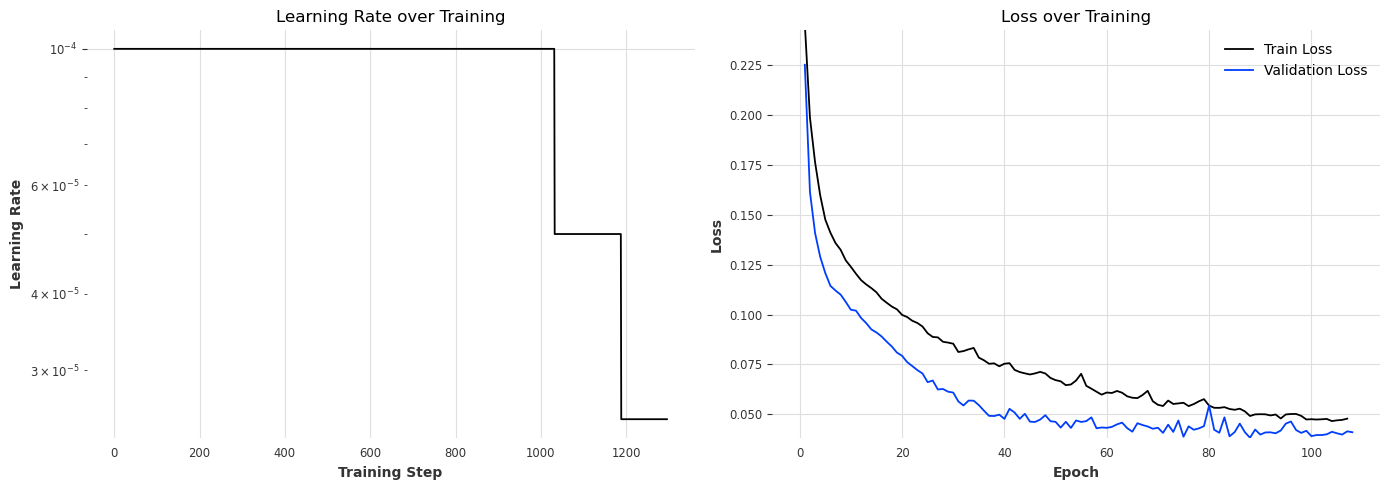

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  808.5831070432555 │ 156.27735097876058 │ 176.64658079764442 │
│ Spread          │   507.712735962844 │  84.05407886560278 │  91.16312576112253 │
│ Overprediction  │ 155.39165943294202 │  35.45621783136744 │  39.74190391091723 │
│ Underprediction │  145.4787116474694 │  36.76705428179039 │  45.74155112560467 │
│ C50             │ 0.8418367346938775 │ 0.8023630504833512 │ 0.8358843537414966 │
│ C95             │                1.0 │ 0.9911385606874329 │ 0.9855442176870748 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

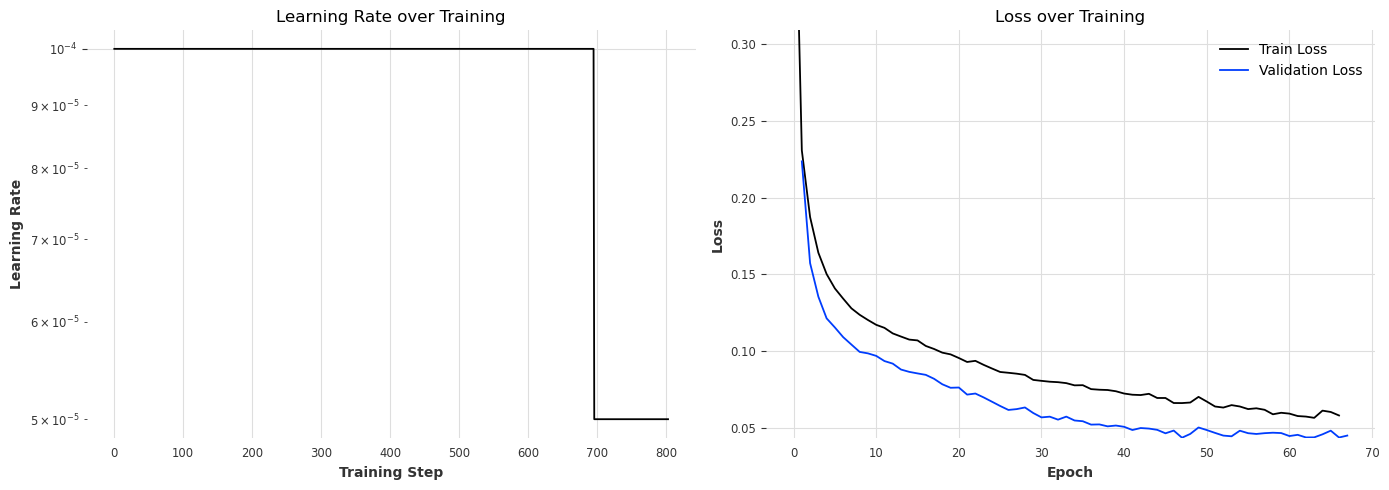

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  908.5594900862242 │  171.6105025254174 │ 195.27234363720612 │
│ Spread          │    591.97744797005 │  98.66034922032179 │ 110.82935024964003 │
│ Overprediction  │ 116.61295067710046 │ 30.055375758152277 │  37.23089182740391 │
│ Underprediction │  199.9690914390737 │ 42.894777546943324 │ 47.212101560162196 │
│ C50             │ 0.8979591836734694 │ 0.7588614393125671 │ 0.7908163265306123 │
│ C95             │                1.0 │ 0.9973147153598282 │ 0.9982993197278912 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

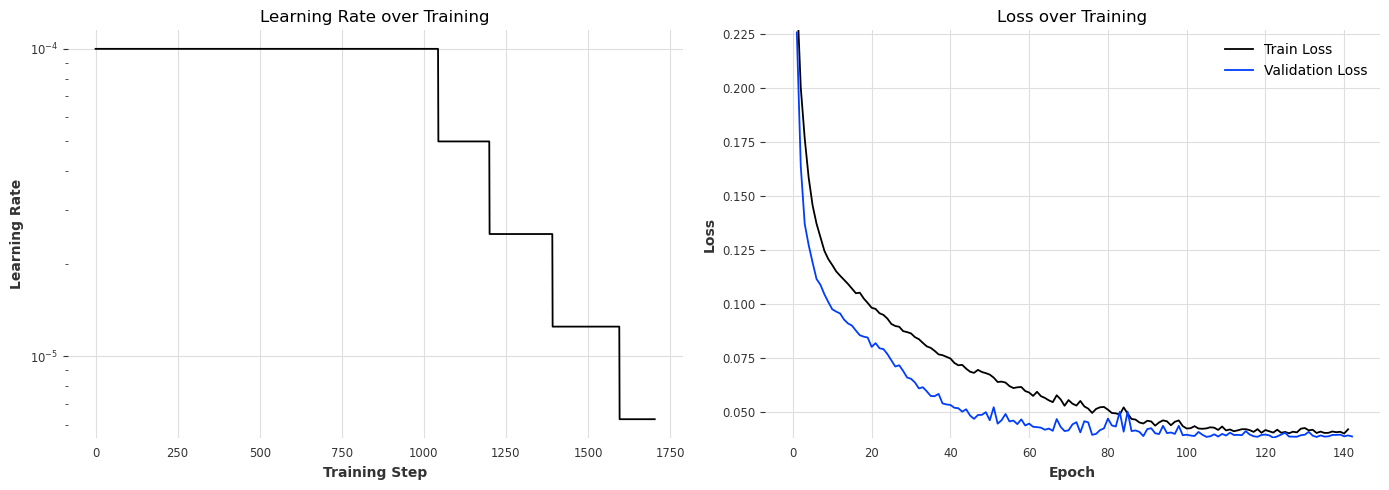

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1375.4012477469546 │ 225.57943422051915 │  240.8741838470099 │
│ Spread          │  481.7196006824955 │  79.33389469776888 │  84.66963642931172 │
│ Overprediction  │  783.3638274378512 │ 117.79126782195483 │ 118.96501290735922 │
│ Underprediction │ 110.31781962660773 │ 28.454271700795417 │  37.23953451033895 │
│ C50             │ 0.6938775510204082 │ 0.7118689581095596 │ 0.7278911564625851 │
│ C95             │ 0.9897959183673469 │ 0.9766380236305048 │ 0.9685374149659864 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

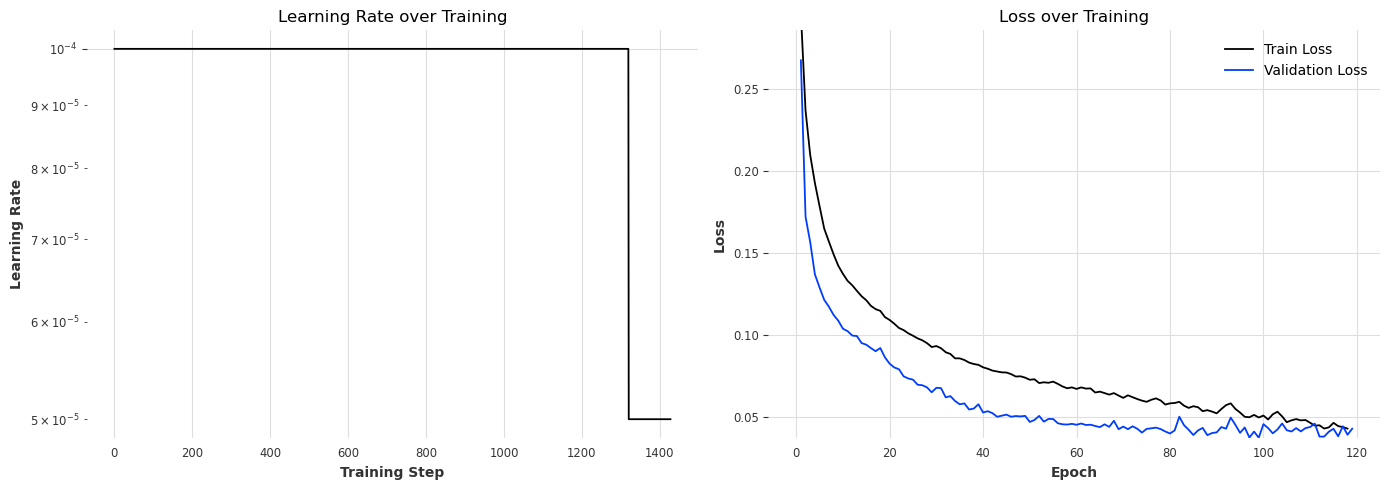

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  975.6009447772283 │  177.2964306928207 │  199.5166334439797 │
│ Spread          │  579.6773971525901 │  92.49701580025513 │  99.45558871450845 │
│ Overprediction  │  267.3953398943441 │  54.76957086120513 │  63.17961423266097 │
│ Underprediction │ 128.52820773029399 │  30.02984403136047 │ 36.881430496810324 │
│ C50             │ 0.8724489795918368 │ 0.7924274973147154 │  0.810374149659864 │
│ C95             │                1.0 │ 0.9916756176154672 │ 0.9906462585034014 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

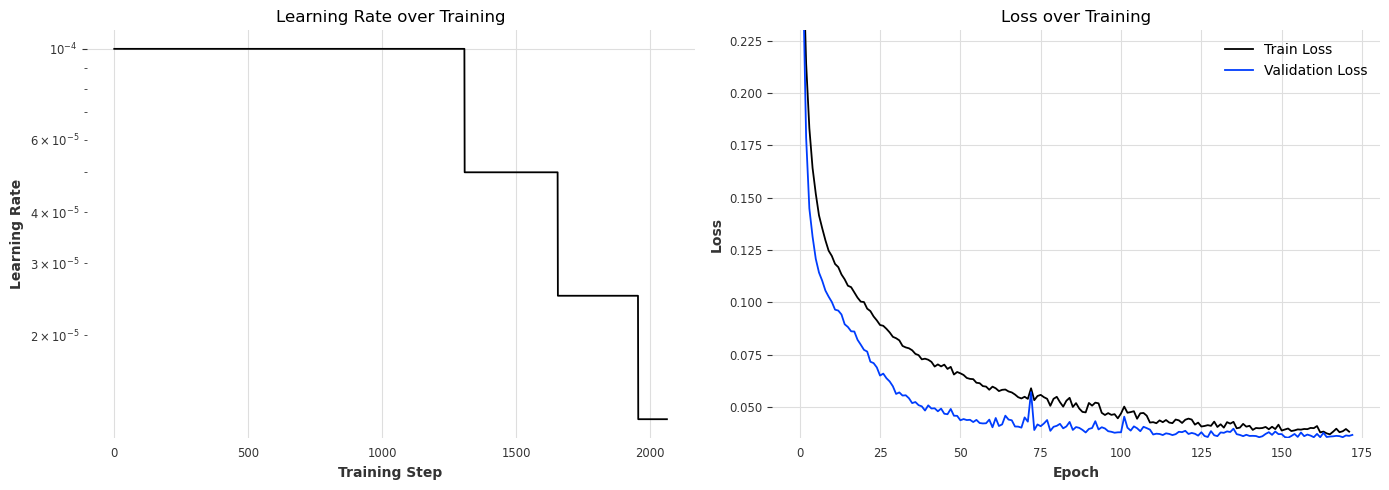

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  848.5583642613677 │ 162.70947971244885 │ 181.31870240048508 │
│ Spread          │  438.4616759777619 │  71.29040661610217 │  74.38783973797516 │
│ Overprediction  │  264.7899812308027 │  52.05239597924199 │ 56.210469881710814 │
│ Underprediction │ 145.30670705280318 │  39.36667711710467 │   50.7203927807991 │
│ C50             │ 0.8316326530612245 │ 0.7569817400644469 │ 0.7653061224489796 │
│ C95             │ 0.9948979591836735 │ 0.9806659505907627 │ 0.9770408163265306 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

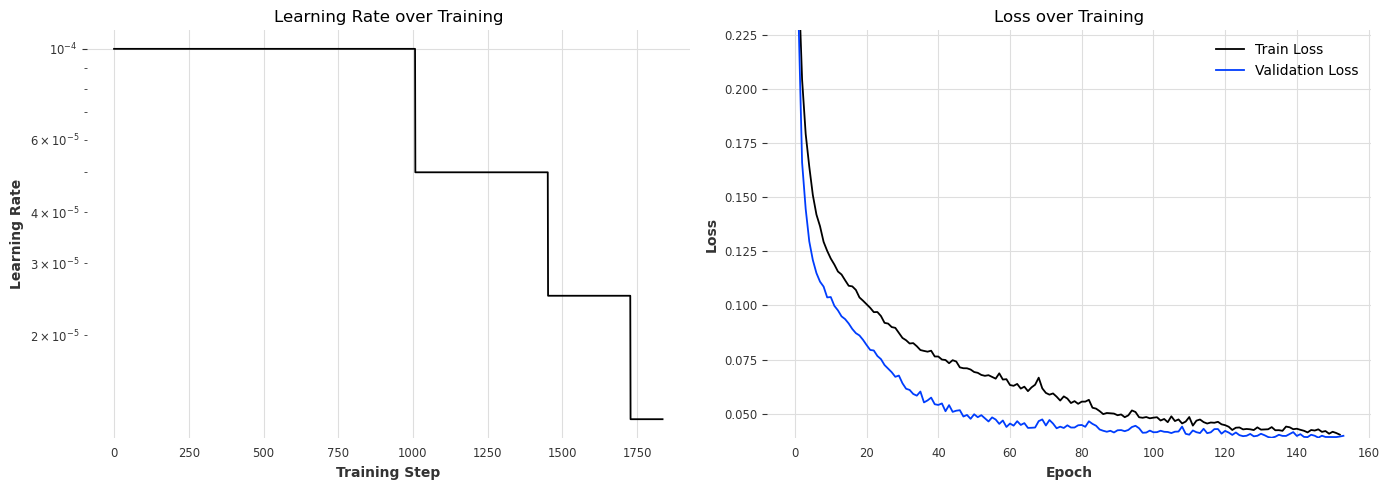

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  1340.793745084292 │  226.3799971894094 │ 251.05450709336682 │
│ Spread          │  444.7541500955595 │  75.31457236931966 │  79.16584106881331 │
│ Overprediction  │  707.3119742314359 │ 110.30196696065356 │ 122.27074561051052 │
│ Underprediction │  188.7276207572966 │   40.7634578594362 │  49.61792041404303 │
│ C50             │ 0.6887755102040817 │ 0.6952201933404941 │ 0.6972789115646258 │
│ C95             │ 0.9897959183673469 │ 0.9779806659505907 │ 0.9659863945578231 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

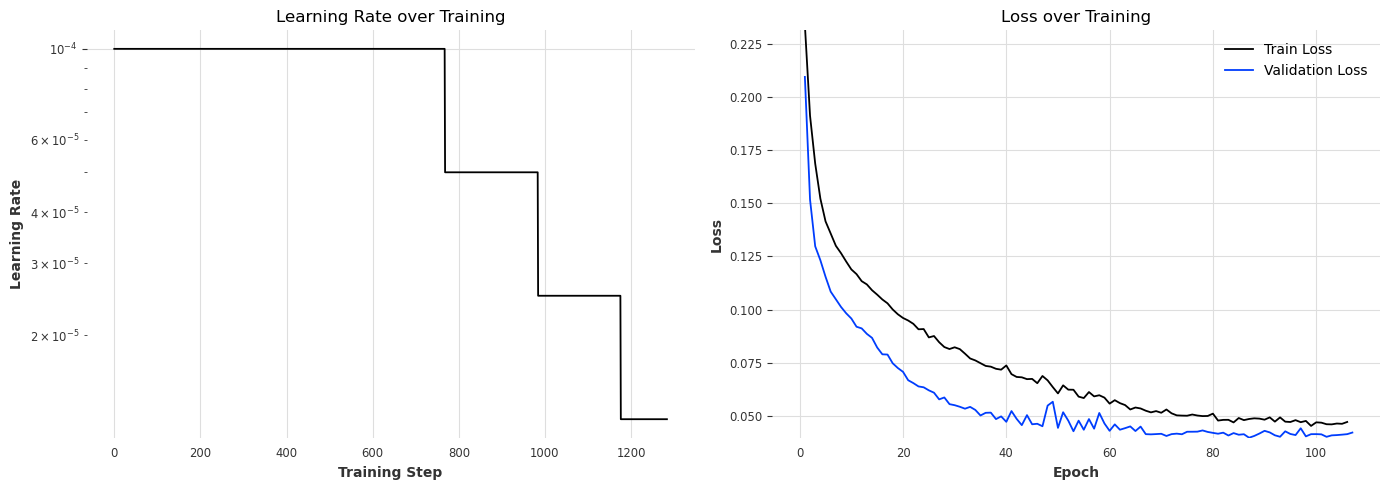

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1040.6419096647091 │  188.9641932606553 │ 214.80210089902698 │
│ Spread          │ 508.82344823424484 │   83.3227649983924 │   88.4833549668175 │
│ Overprediction  │ 421.77634452460705 │   73.7260036110131 │  84.00518558983454 │
│ Underprediction │ 110.04211690585718 │ 31.915424651249804 │  42.31356034237497 │
│ C50             │ 0.8367346938775511 │ 0.7859828141783028 │ 0.7967687074829932 │
│ C95             │ 0.9897959183673469 │ 0.9868421052631579 │ 0.9829931972789115 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

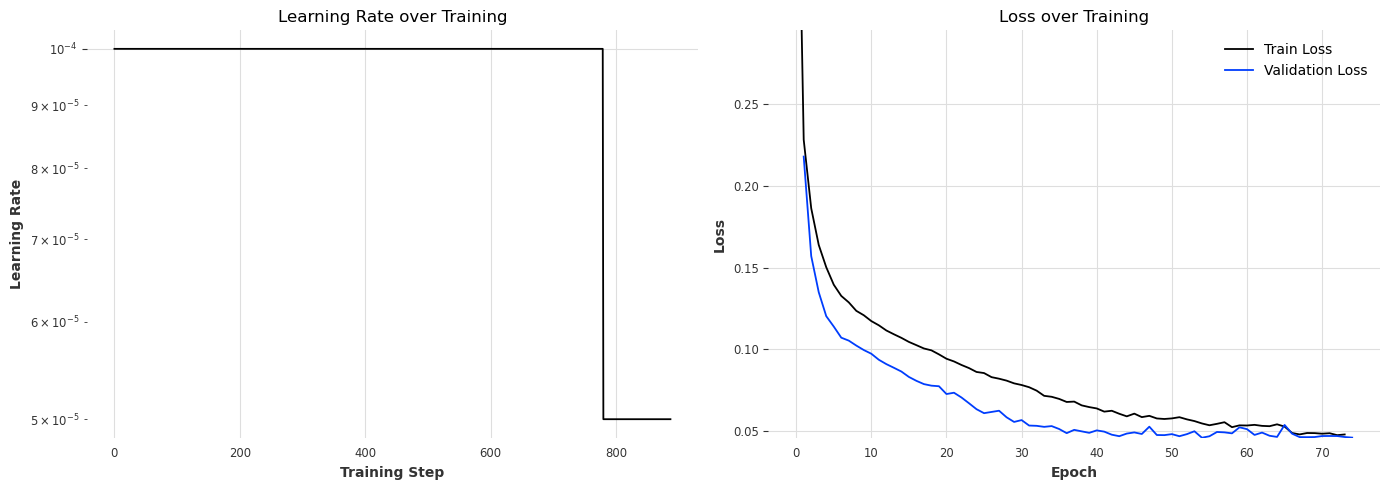

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  880.9624922517994 │ 167.12439936822813 │  188.1911814467927 │
│ Spread          │  486.2681161608169 │  79.83744965365734 │  85.78467556481833 │
│ Overprediction  │ 153.02613695432566 │  31.54887104286431 │   34.8452691409623 │
│ Underprediction │ 241.66823913665684 │ 55.738078671706454 │  67.56123674101211 │
│ C50             │ 0.9183673469387755 │ 0.8133727175080558 │ 0.7636054421768708 │
│ C95             │                1.0 │ 0.9871106337271751 │ 0.9770408163265306 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

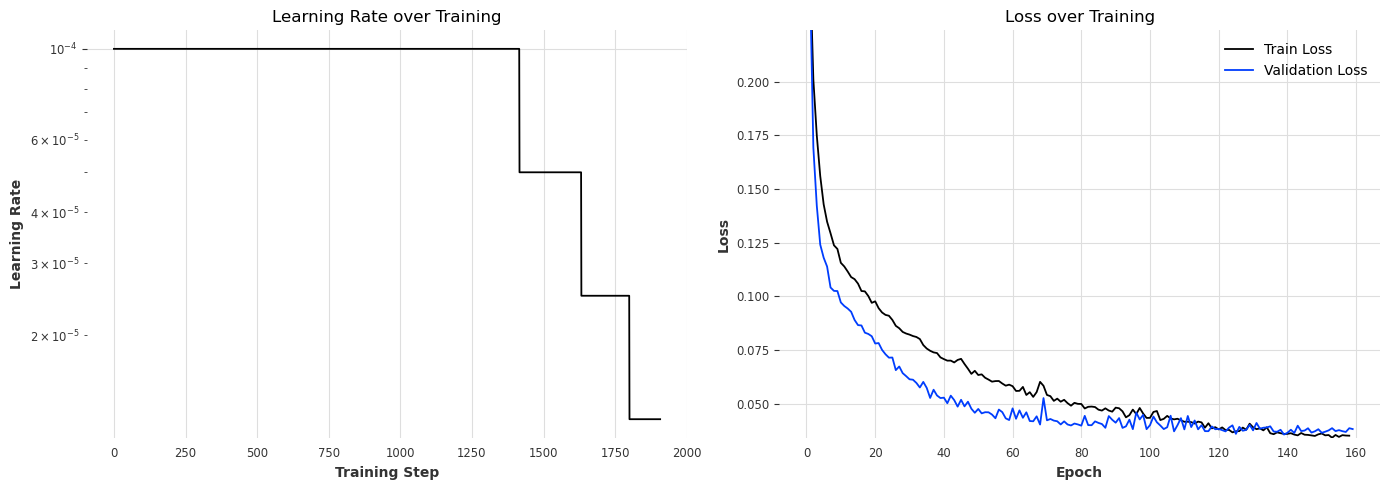

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1033.5595775827728 │ 189.35467660944227 │ 212.89822134423466 │
│ Spread          │ 380.63543876119115 │  65.06364223811565 │  69.05608007376433 │
│ Overprediction  │  536.7954170148987 │  93.38100073636458 │  105.4463533654453 │
│ Underprediction │ 116.12872180668292 │  30.91003363496204 │  38.39578790502499 │
│ C50             │ 0.7602040816326531 │ 0.7381847475832438 │ 0.7474489795918368 │
│ C95             │                1.0 │ 0.9777121374865736 │ 0.9795918367346939 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

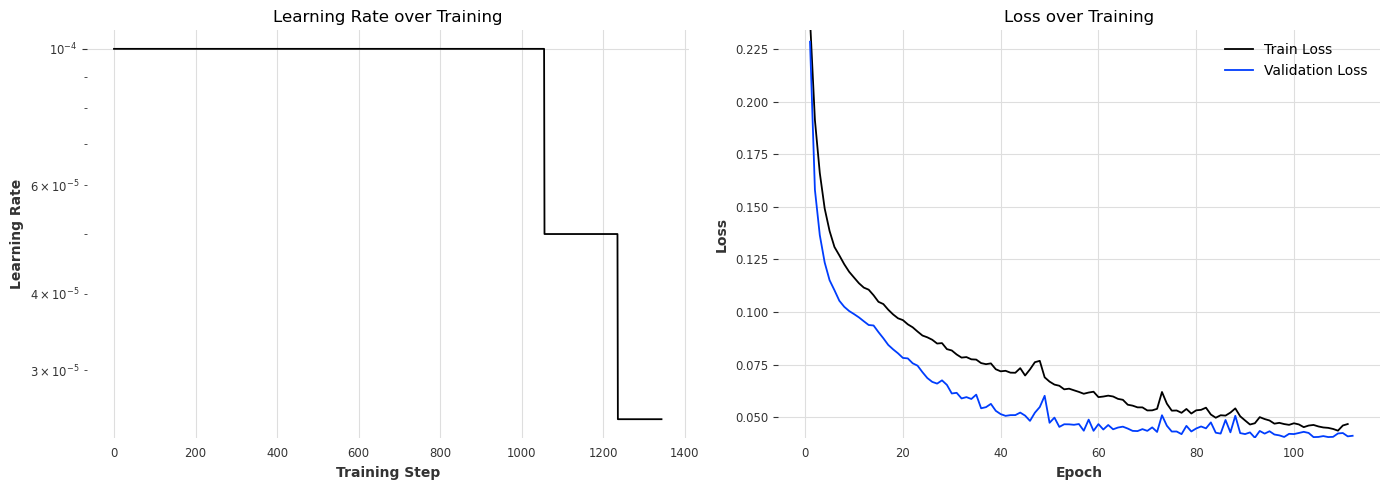

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         TSMixerModel Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  888.6995239970087 │  165.5110131659723 │  186.6546528874812 │
│ Spread          │ 458.59385748811997 │   78.4446282232144 │  86.22058615616731 │
│ Overprediction  │ 219.45399622400902 │  41.36974506762756 │  46.82849826190169 │
│ Underprediction │  210.6516702848797 │  45.69663987513032 │  53.60556846941218 │
│ C50             │ 0.8316326530612245 │ 0.7878625134264232 │ 0.8044217687074829 │
│ C95             │                1.0 │ 0.9838882921589689 │ 0.9778911564625851 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

In [27]:
best_config = BestConfig()
config = best_config.tsmixer_qr_config_nc #! Select the model here
fixed_kwargs = best_config.fixed_config

log = {"hfc": [], "df_ret": [], "scores_dict": []}

use_covariates = config.pop('use_covariates')
scale = config.pop('scale', False)
modelfactory = ModelFactory(model_kwargs=config, fixed_kwargs=best_config.fixed_config)


for _ in range(10):
    # Load data
    ts_names = ['survstat', 'icosari', 'agi', 'cvn']
    ts = load_data(ts_names)
    
    # Create static covariates
    ts.static_covariates.drop(columns=['source', 'target'], inplace=True)
    
    covariates_transformer = StaticCovariatesTransformer(transformer_cat=OneHotEncoder())
    ts = covariates_transformer.fit_transform(ts)
    
    # Get Targets
    train_end = pd.Timestamp('2018-09-30')
    validation_start = pd.Timestamp('2018-10-07')
    validation_end = pd.Timestamp('2019-09-29')
    test_start = pd.Timestamp('2019-10-06')
    test_end = pd.Timestamp('2020-09-27')
    
    TARGETS = [t for t in ts.columns if 'survstat-influenza' in t]  # The 19 time series we want to predict
    targets, covariates = target_covariate_split(ts, TARGETS)
    
    # More Covariates
    encoders = {
        'cyclic': {'future': ['month', 'weekofyear']},
    }
    
    # Normalize targets
    scaler = None
    if scale is True:
        encoders['transformer'] = Scaler()
    
        scaler = Scaler(MinMaxScaler(feature_range=(0.0001, 1)),
                        global_fit=False)  # Scale the data using a Scaler from sklearn
        scaler.fit(targets[: train_end])  # Fit the scaler to the training data
        targets = scaler.transform(targets)  # Transform the data
    
        scaler2 = Scaler(MinMaxScaler(feature_range=(0.0001, 1)),
                         global_fit=False)  # Scale the data using a Scaler from sklearn
        scaler2.fit(covariates[: train_end])  # Fit the scaler to the training data
        covariates = scaler2.transform(covariates)  # Transform the data
    
    if use_covariates is True:
        print("Using covariates")
    covariates_dict_train, covariates_dict_val = get_covariates_dict(use_covariates,
                                                                     covariates)
    # Train model
    model = modelfactory.get_model()
    model.fit(series=targets[:train_end],
                val_series=targets[validation_start - modelfactory.model_kwargs["input_chunk_length"] * targets.freq:validation_end],
                **covariates_dict_train)
    model = model.__class__.load_from_checkpoint(model_name=model.model_name, best=True)
    
    # Evaluate model
    hfc, df_ret, scores_dict = evaluate_model(model=model,
                       targets=targets,
                       start=test_start,
                       end=test_end,
                       covariates=covariates_dict_val,
                       deterministic=isinstance(model.likelihood, NegativeBinomialLikelihood),
                       scaler=scaler if scale else None,
                       verbose=True,
                       log=False)
    
    log["hfc"].append(hfc)
    log["df_ret"].append(df_ret)
    log["scores_dict"].append(scores_dict)

## Analysis/Saving of Results

In [28]:
PATH = "results/results_test.csv"
PATH_DETAILED = "results/results_test_detailed.csv"

scores = log["scores_dict"]
df_list = []
for i in range(len(scores)):
    n = pd.DataFrame(scores[i]["national"])
    s = pd.DataFrame(scores[i]["state"])
    a = pd.DataFrame(scores[i]["age"])
    for j, name in zip([n, s, a], ["national", "state", "age"]):
        j.columns = [f"{col}_{name}" for col in j.columns]
    df_list.append(pd.concat([n, s, a], axis=1))
df = pd.concat(df_list)

model_name = modelfactory.name
df.drop(["model_national", "model_state", "model_age"], inplace=True, axis=1)
agg = df.aggregate(["mean", "std"])
agg["model"] = model_name
agg.reset_index(inplace=True)
agg.rename(columns={"index": "aggregation"}, inplace=True)
full_df = pd.read_csv(PATH)
full_df = pd.concat([full_df, agg], axis=0)
full_df.to_csv(PATH, index=False)

df["fold"] = range(len(scores))
df["model"] = model_name
full_df = pd.read_csv(PATH_DETAILED)
full_df = pd.concat([full_df, df], axis=0)
full_df.to_csv(PATH_DETAILED, index=False)

#### To Latex

In [3]:
PATH = "results/results_test.csv"

In [5]:
df = pd.read_csv(PATH)
mapping = {
    'national': ['spread_national', 'overprediction_national', 'underprediction_national', 'wis_national', 'c50_national', 'c95_national'],
    'state': ['spread_state', 'overprediction_state', 'underprediction_state', 'wis_state', 'c50_state', 'c95_state'],
    'age': ['spread_age', 'overprediction_age', 'underprediction_age', 'wis_age', 'c50_age', 'c95_age']
}
# Melt the DataFrame
df_long = pd.melt(df, id_vars=['aggregation', 'model'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')
# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df_final = df_long.pivot_table(index=['aggregation', 'model', 'stratum'], columns='variable', values='value').reset_index()
df = df_final

df["c50"] = (df["c50"]*100)
df["c95"] = (df["c95"]*100)
df = df.round(1)

# Begin tablular environment
print("\\begin{tabular}{llSSS}")
# Print the toprule
print("\\toprule")
# Print the first row
print("\\multicolumn{2}{c}{\\textbf{model}} & \multicolumn{1}{c}{\\textbf{WIS}} & \multicolumn{1}{c}{\\textbf{c50}} & \multicolumn{1}{c}{\\textbf{c95}} \\\\")
# Iterate over the rows of the df
stratum_list = ["national", "state", "age"]
for stratum in stratum_list:
    print("\\midrule")
    print("\\multirow{6}{*}{\\rotatebox[origin=c]{90}{\\textit{" + stratum + "}}}")
    # For each model: & NLinear & $1531 \pm 733$ & $0.28 \pm 0.10$ & $0.78 \pm 0.11$ \\
    for model in ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]:
        rows = df[(df["model"] == model) & (df["stratum"] == stratum)]
        print("& " + model + " & " + str(rows["wis"].values[0]) + " \pm " + str(rows["wis"].values[1]) + " & " + str(rows["c50"].values[0]) + " \pm " + str(rows["c50"].values[1]) + " & " + str(rows["c95"].values[0]) + " \pm " + str(rows["c95"].values[1]) + "\\\\")

# End tabular environment
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{llSSS}
\toprule
\multicolumn{2}{c}{\textbf{model}} & \multicolumn{1}{c}{\textbf{WIS}} & \multicolumn{1}{c}{\textbf{c50}} & \multicolumn{1}{c}{\textbf{c95}} \\
\midrule
\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{national}}}
& NLinear + QR & 1377.7 \pm 94.5 & 48.0 \pm 3.4 & 77.9 \pm 2.0\\
& DLinear + QR & 1458.7 \pm 59.5 & 41.2 \pm 6.0 & 79.8 \pm 0.8\\
& TSMixer + QR & 1174.9 \pm 199.6 & 69.6 \pm 15.1 & 97.3 \pm 3.5\\
& TFT + QR & 941.2 \pm 149.8 & 76.3 \pm 7.8 & 98.2 \pm 1.9\\
& TSMixer + NB & 853.8 \pm 96.4 & 36.1 \pm 4.2 & 81.0 \pm 4.2\\
& TFT + NB & 1149.2 \pm 222.3 & 32.9 \pm 8.0 & 69.3 \pm 8.3\\
\midrule
\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{state}}}
& NLinear + QR & 195.5 \pm 5.0 & 60.3 \pm 2.9 & 91.6 \pm 1.1\\
& DLinear + QR & 198.2 \pm 2.7 & 57.9 \pm 1.9 & 93.3 \pm 0.5\\
& TSMixer + QR & 212.3 \pm 25.2 & 68.4 \pm 9.1 & 96.3 \pm 2.2\\
& TFT + QR & 176.2 \pm 18.3 & 72.6 \pm 5.5 & 97.2 \pm 2.2\\
& TSMixer + NB & 156.5 \pm 12.3 & 50.1 \pm 1.3 & 87.1 

## Comparing the model with Covariates against models without Covariates

In [47]:
df_c = pd.read_csv("results/results_test_c.csv")
df_c.loc[df_c["model"] == "TSMixer + QR + NC", "model"] = "TSMixer + QR"

df = pd.read_csv("results/results_test.csv")
df.loc[df["model"] == "TSMixer + QR", "model"] = "TSMixer + QR + C"
full = pd.concat([df, df_c], axis=0)

full["covariates"] = [True if "+ C" in model else False for model in full["model"]]
full["model"] = full["model"].str.replace(" + C", "")

In [48]:
mapping = {
    'national': ['spread_national', 'overprediction_national', 'underprediction_national', 'wis_national', 'c50_national', 'c95_national'],
    'state': ['spread_state', 'overprediction_state', 'underprediction_state', 'wis_state', 'c50_state', 'c95_state'],
    'age': ['spread_age', 'overprediction_age', 'underprediction_age', 'wis_age', 'c50_age', 'c95_age']
}
# Melt the DataFrame
df_long = pd.melt(full, id_vars=['aggregation', 'model', 'covariates'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')
# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df_final = df_long.pivot_table(index=['aggregation', 'model', 'stratum', 'covariates'], columns='variable', values='value').reset_index()
full = df_final

In [50]:
full

variable,aggregation,model,stratum,covariates,c50,c95,overprediction,spread,underprediction,wis
0,mean,DLinear + QR,age,False,0.620663,0.953656,35.117034,85.329846,48.660998,169.107878
1,mean,DLinear + QR,age,True,0.529337,0.917347,31.756980,83.288671,93.835873,208.881523
2,mean,DLinear + QR,national,False,0.412245,0.798469,78.079254,212.260364,1168.326689,1458.666306
3,mean,DLinear + QR,national,True,0.492347,0.886224,74.008278,340.585861,1226.623514,1641.217653
4,mean,DLinear + QR,state,False,0.579216,0.932626,36.925251,68.187727,93.128656,198.241634
...,...,...,...,...,...,...,...,...,...,...
67,std,TSMixer + QR,age,True,0.090799,0.018832,34.856065,29.563987,16.589075,27.952623
68,std,TSMixer + QR,national,False,0.078997,0.004840,239.490677,63.941497,47.096966,198.300135
69,std,TSMixer + QR,national,True,0.150704,0.035352,166.612418,278.738212,108.853653,199.581390
70,std,TSMixer + QR,state,False,0.039384,0.006944,32.923018,9.715631,8.499359,24.981497


In [56]:
df = full
df["c50"] = (df["c50"]*100)
df["c95"] = (df["c95"]*100)
df = df.round(1)
# Begin tablular environment
print("\\begin{tabular}{llSS}")
# Print the toprule
print("\\toprule")
# Print the first row
print("&&\\multicolumn{1}{c}{\\textbf{no covariates}} & \\multicolumn{1}{c}{\\textbf{with covariates}}\\\\")
print("\\multicolumn{2}{c}{\\textbf{model}} & \multicolumn{1}{c}{\\textbf{WIS}} &  \multicolumn{1}{c}{\\textbf{WIS}} \\\\")
# Iterate over the rows of the df
stratum_list = ["national", "state", "age"]
for stratum in stratum_list:
    print("\\midrule")
    print("\\multirow{6}{*}{\\rotatebox[origin=c]{90}{\\textit{" + stratum + "}}}")
    # For each model: & NLinear & $1531 \pm 733$ & $0.28 \pm 0.10$ & $0.78 \pm 0.11$ \\
    for model in ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]:
        rows = df[(df["model"] == model) & (df["stratum"] == stratum) & (df["covariates"] == False)]
        print("& " + model + " & " + str(rows["wis"].values[0]) + " \pm " + str(rows["wis"].values[1]), end="")
        rows = df[(df["model"] == model) & (df["stratum"] == stratum) & (df["covariates"] == True)]
        print(" & " + str(rows["wis"].values[0]) + " \pm " + str(rows["wis"].values[1]) + "\\\\")

# End tabular environment
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{llSS}
\toprule
&&\multicolumn{1}{c}{\textbf{no covariates}} & \multicolumn{1}{c}{\textbf{with covariates}}\\
\multicolumn{2}{c}{\textbf{model}} & \multicolumn{1}{c}{\textbf{WIS}} &  \multicolumn{1}{c}{\textbf{WIS}} \\
\midrule
\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{national}}}
& NLinear + QR & 1377.7 \pm 94.5 & 1271.6 \pm 49.6\\
& DLinear + QR & 1458.7 \pm 59.5 & 1641.2 \pm 212.0\\
& TSMixer + QR & 1010.1 \pm 198.3 & 1174.9 \pm 199.6\\
& TFT + QR & 941.2 \pm 149.8 & 1102.0 \pm 322.8\\
& TSMixer + NB & 853.8 \pm 96.4 & 1147.3 \pm 420.3\\
& TFT + NB & 1149.2 \pm 222.3 & 1227.8 \pm 561.3\\
\midrule
\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{state}}}
& NLinear + QR & 195.5 \pm 5.0 & 366.4 \pm 17.7\\
& DLinear + QR & 198.2 \pm 2.7 & 226.1 \pm 10.5\\
& TSMixer + QR & 183.1 \pm 25.0 & 212.3 \pm 25.2\\
& TFT + QR & 176.2 \pm 18.3 & 203.9 \pm 52.0\\
& TSMixer + NB & 156.5 \pm 12.3 & 202.6 \pm 41.8\\
& TFT + NB & 193.4 \pm 25.0 & 195.0 \pm 34.7\\
\midrule
\multiro

## Plots

In [31]:
from utils import plot_forecasts_fancy
from externals.respinow_ml.src.plot_functions import *
from plotnine import ylim

In [32]:
if scale:
    targets_plot = scaler.inverse_transform(targets[test_start:test_end])
else:
    targets_plot = targets[test_start:test_end]
df_plot = prepare_plot_data(df_ret, targets_plot)

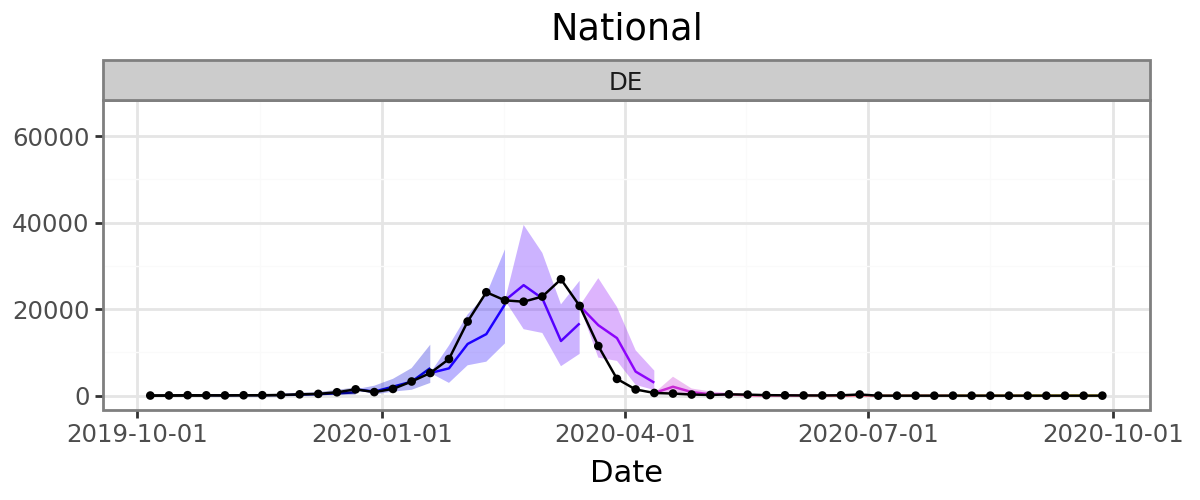

/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6 x 2.5 in image.
/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/forecast_national.pdf


In [34]:
p = plot_forecasts_fancy(df_plot, 'national', confidence_interval=95, stride=4)
p = p + ylim(-10, 65000)
p.show()
p.save("plots/forecast_national.pdf")

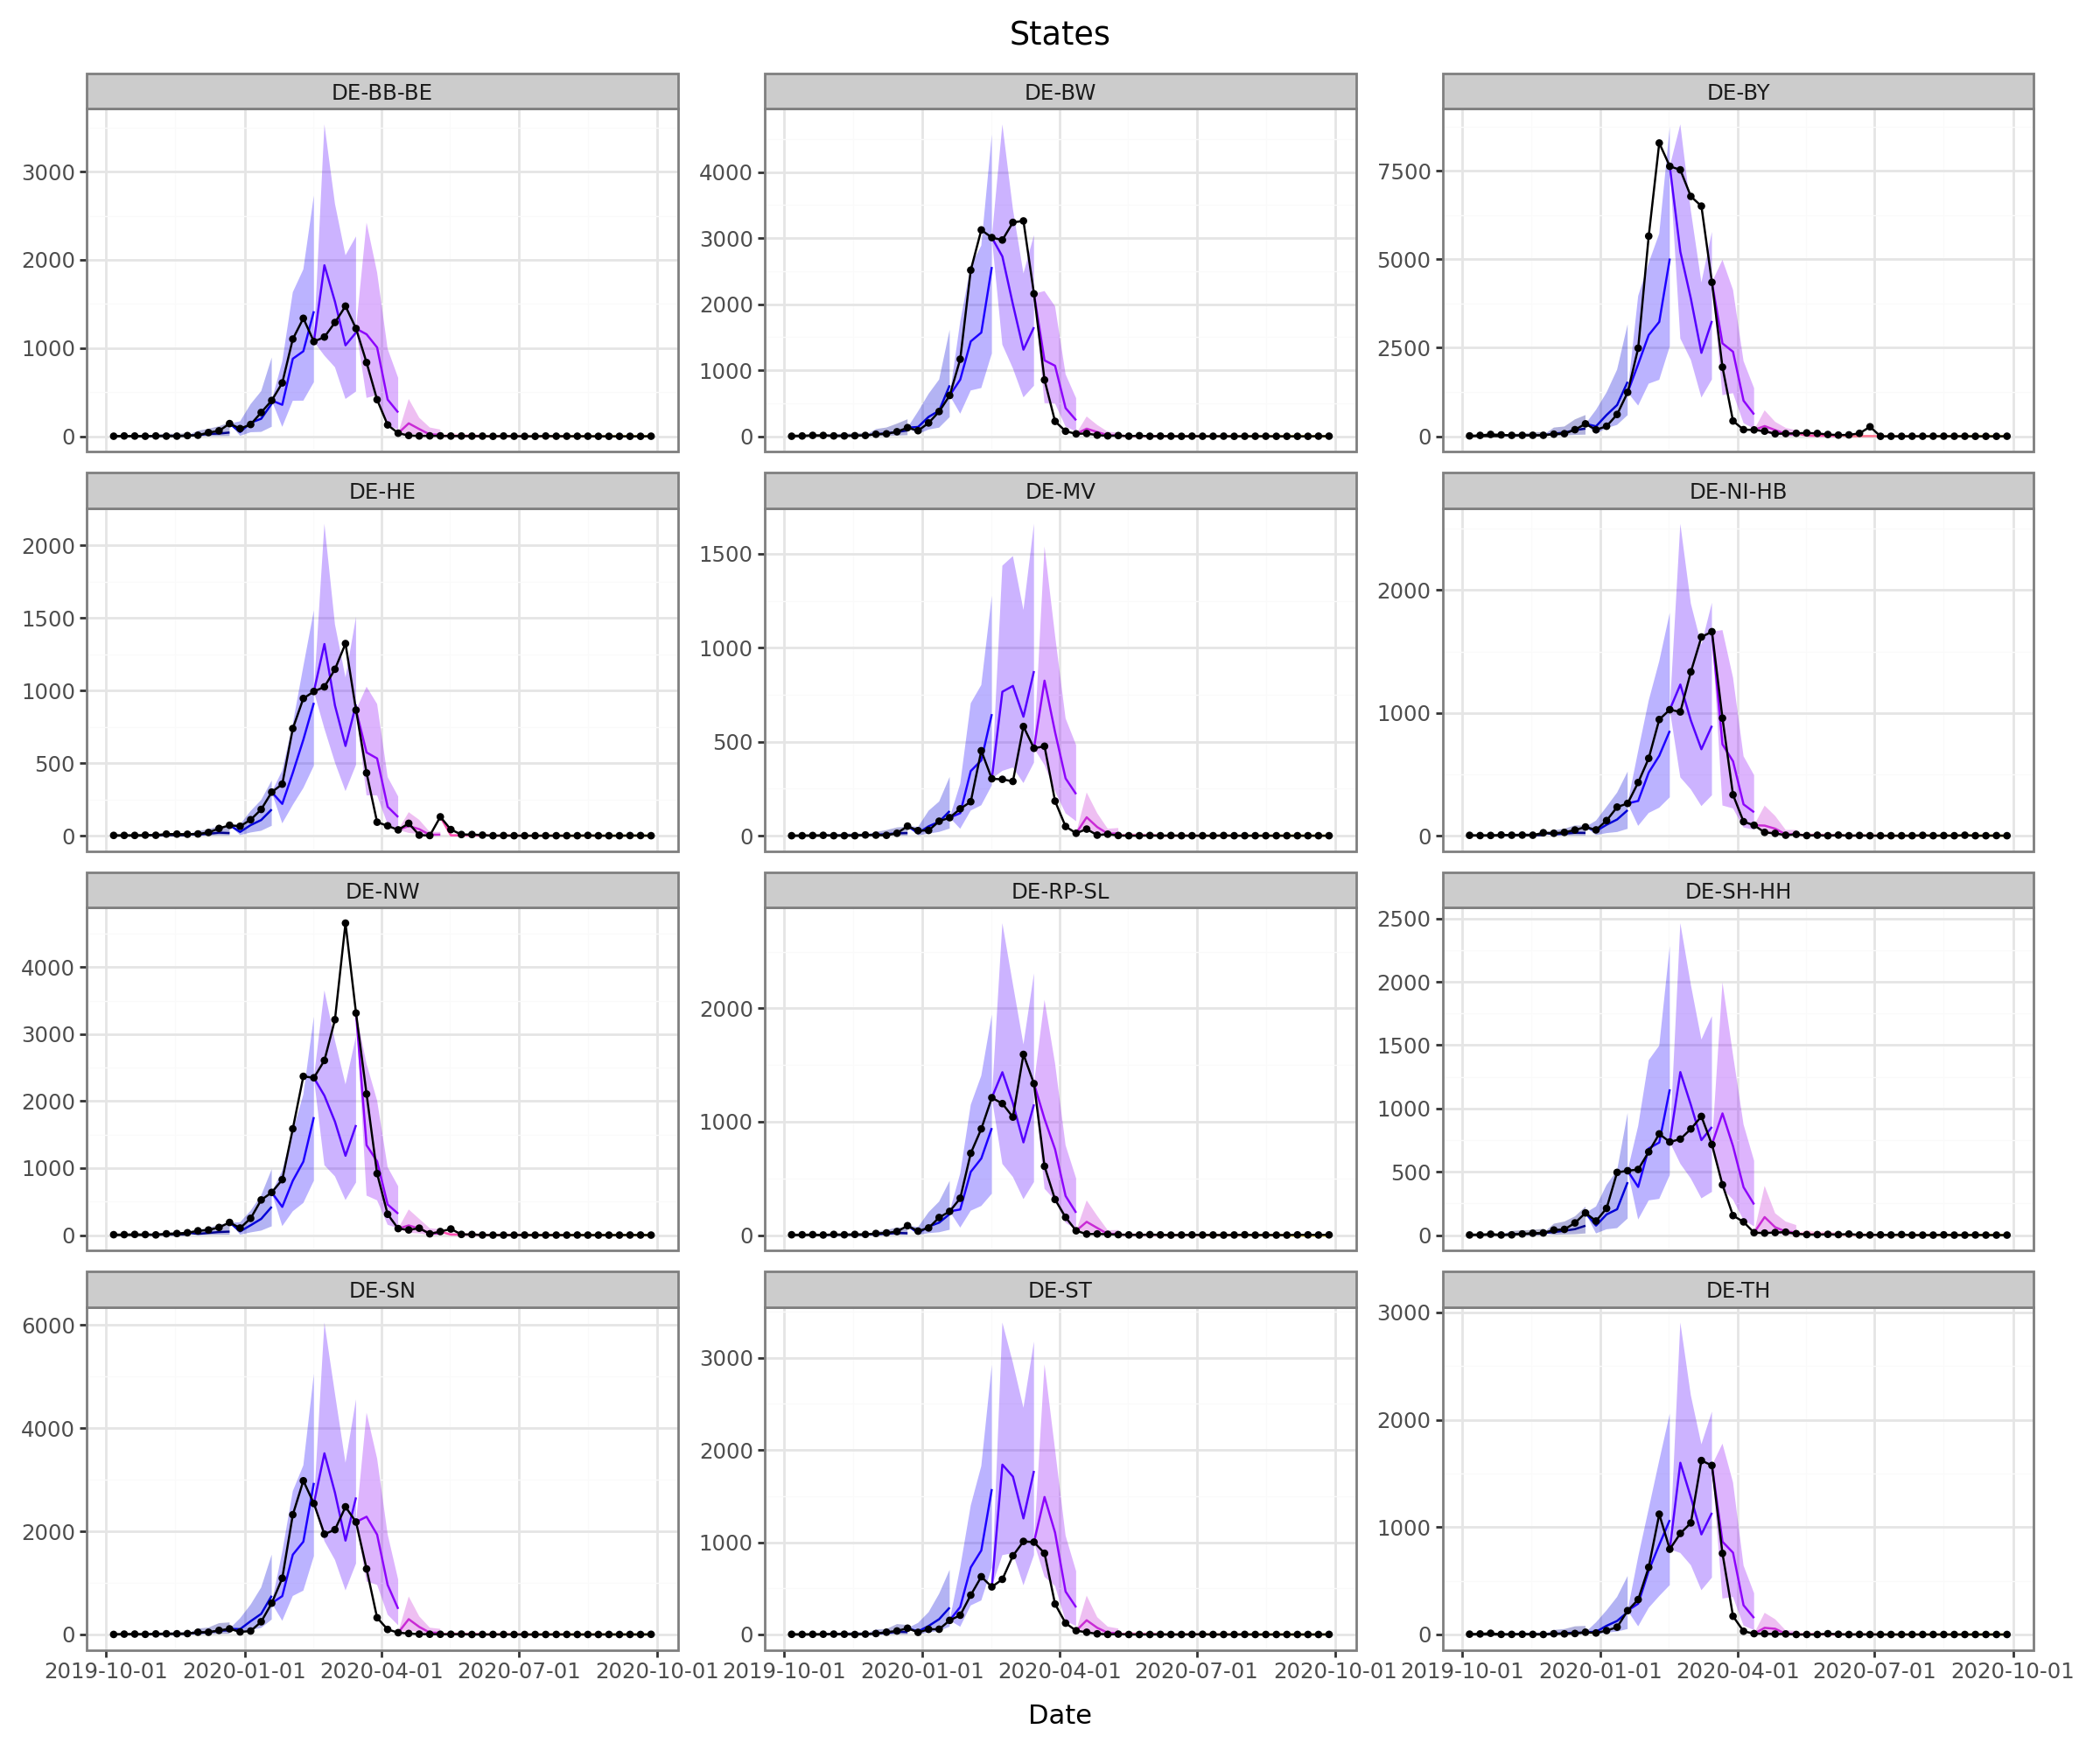

/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 10 in image.
/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/forecast_states_tsmixer.pdf


In [35]:
p = plot_forecasts_fancy(df_plot, 'states', confidence_interval=95, stride=4)
p.show()
p.save("plots/forecast_states_tsmixer.pdf")

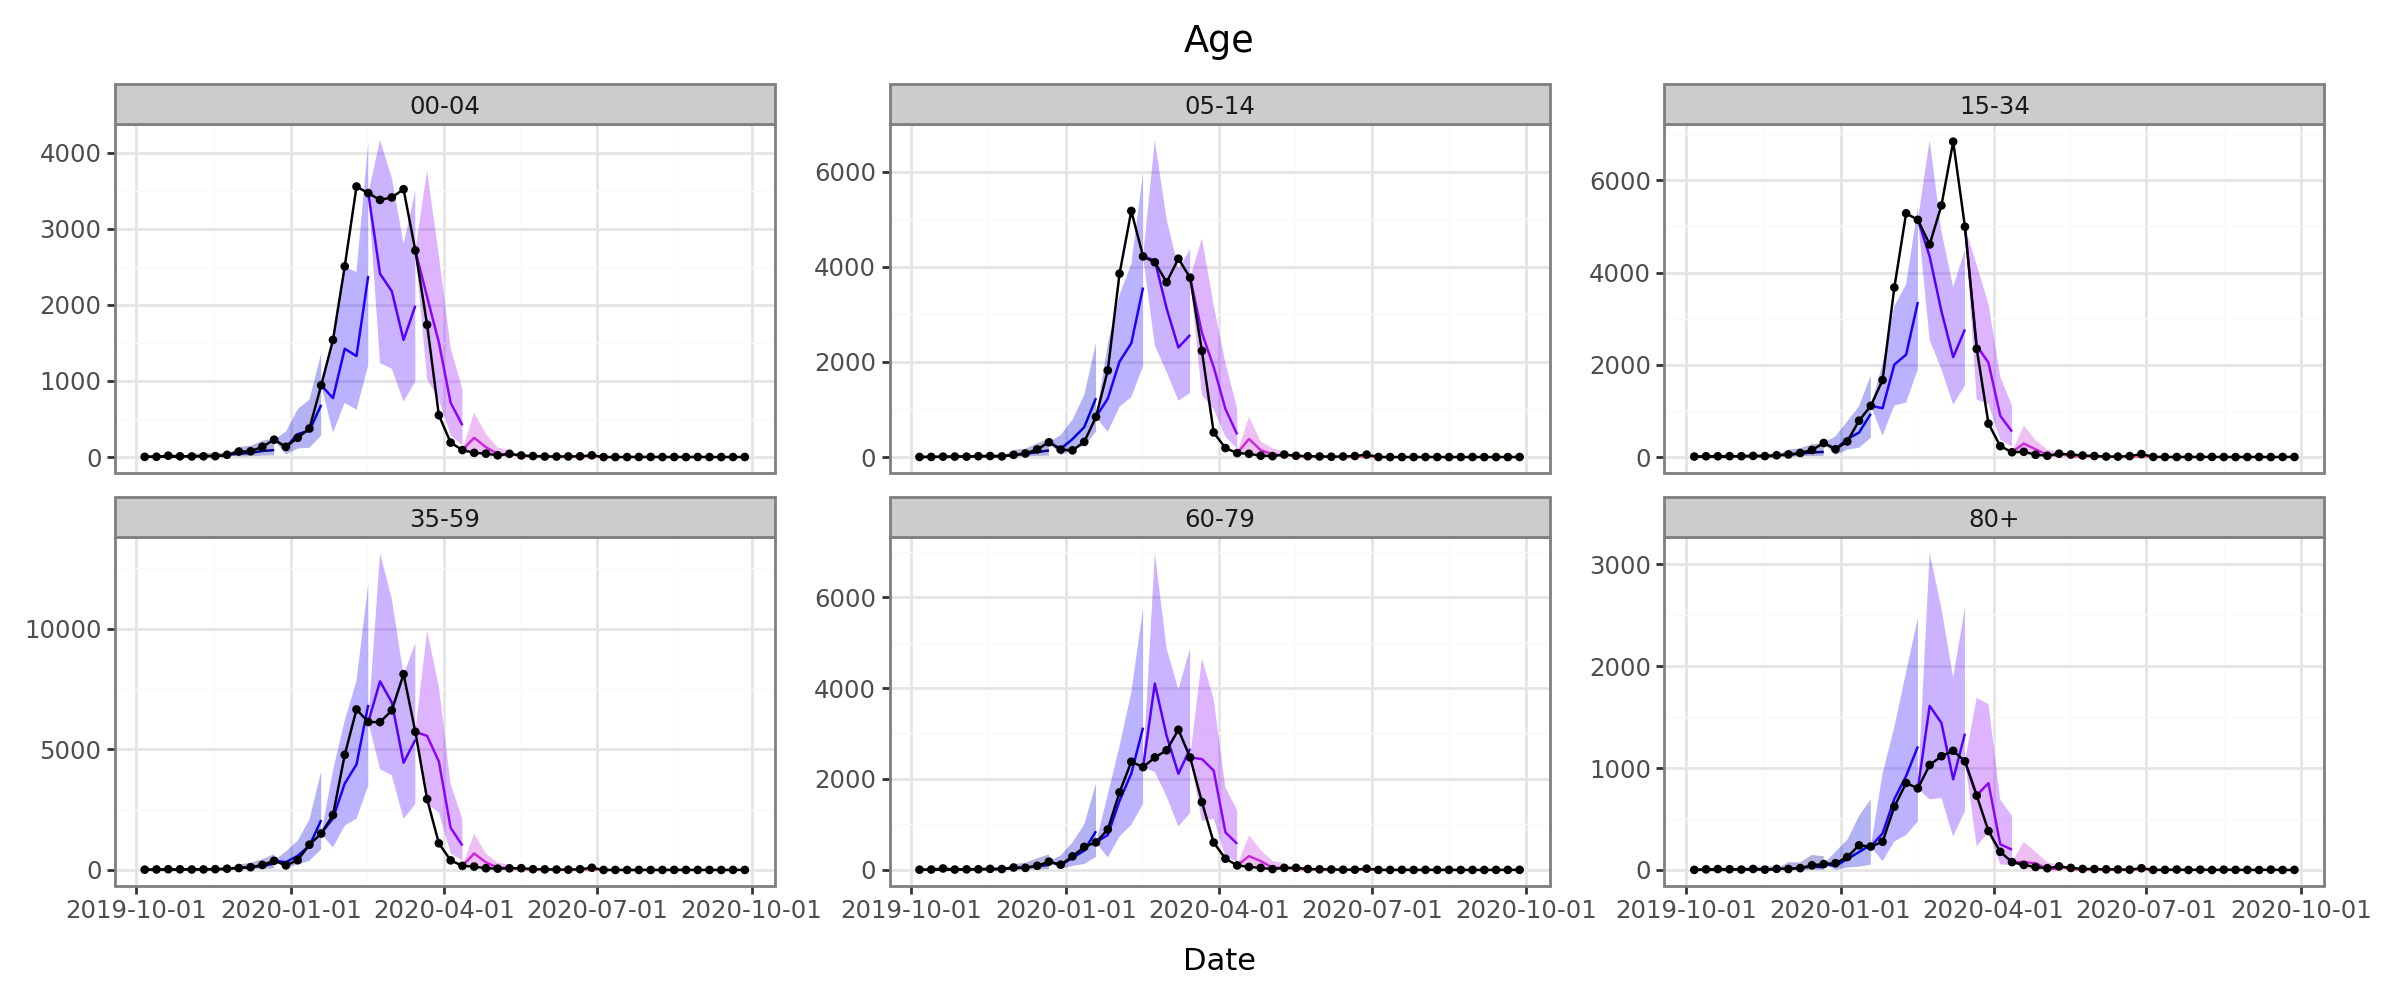

/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 5 in image.
/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/forecast_age_tsmixer.pdf


In [36]:
p = plot_forecasts_fancy(df_plot, 'age', confidence_interval=95, stride=4)
p.show()
p.save("plots/forecast_age_tsmixer.pdf")

#### Decomposition of WIS

In [2]:
df = pd.read_csv("results/results_test.csv")
df = df[df["aggregation"] == "mean"]
df = df.drop(columns=["aggregation"])

In [3]:
mapping = {}
for level in ["national", "state", "age"]:
    mapping[level] = df.columns[df.columns.str.contains(level)]

# Melt the DataFrame
df_long = pd.melt(df, id_vars=['model'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')

# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df = df_long.pivot_table(index=['model', 'stratum'], columns='variable', values='value').reset_index()

# Define the desired order for the model column
model_order = ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]

# Convert the model column to a categorical type with the specified order
df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)

# Sort the DataFrame by the model column
df = df.sort_values('model').reset_index(drop=True)

df

variable,model,stratum,c50,c95,overprediction,spread,underprediction,wis
0,NLinear + QR,age,0.613776,0.941582,37.155327,90.457215,43.905341,171.517883
1,NLinear + QR,national,0.480102,0.779082,102.537934,284.087077,991.029728,1377.654739
2,NLinear + QR,state,0.602927,0.915789,40.450819,74.038678,80.972876,195.462373
3,DLinear + QR,age,0.620663,0.953656,35.117034,85.329846,48.660998,169.107878
4,DLinear + QR,national,0.412245,0.798469,78.079254,212.260364,1168.326689,1458.666306
5,DLinear + QR,state,0.579216,0.932626,36.925251,68.187727,93.128656,198.241634
6,TSMixer + QR,age,0.710544,0.963776,73.732761,103.382653,56.203715,233.319129
7,TSMixer + QR,national,0.695918,0.972959,335.059278,630.824240,208.994328,1174.877846
8,TSMixer + QR,state,0.684023,0.962594,67.465321,96.528232,48.304452,212.298005
9,TFT + QR,age,0.757653,0.977126,45.601020,97.932294,48.761223,192.294537


/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


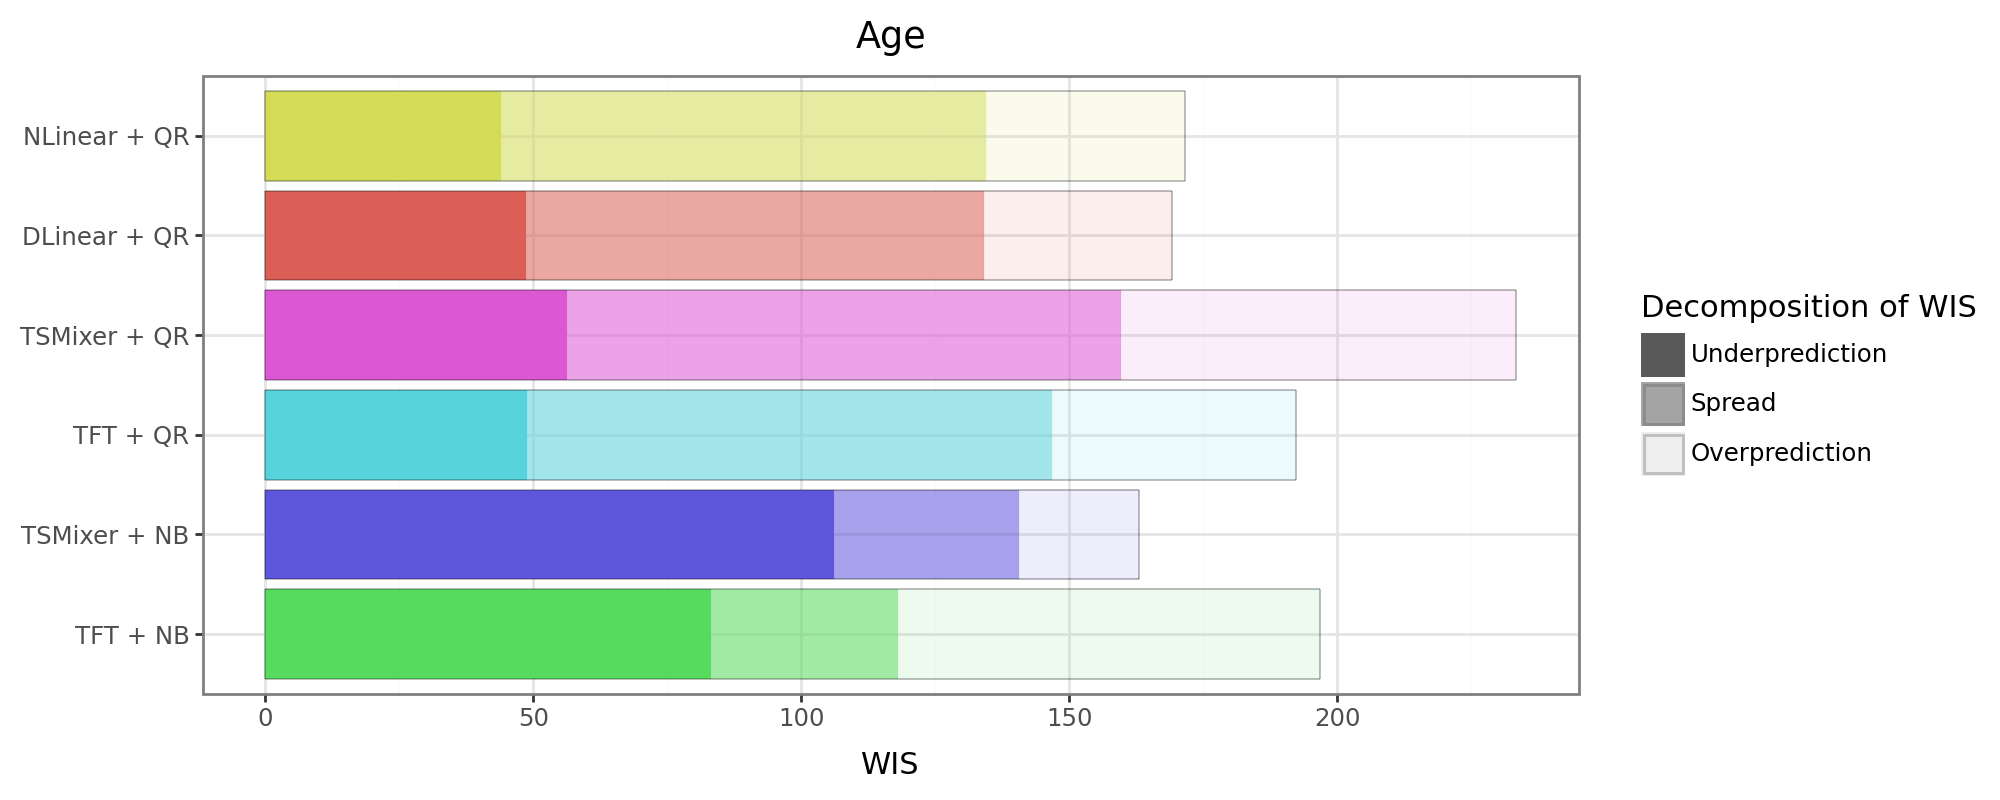

/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 4 in image.
/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/decomposition_age.pdf


In [35]:
from plotnine import ggplot, aes, geom_bar, scale_alpha_discrete, labs, coord_flip, theme_bw, theme, guide_legend, scale_x_discrete

level = ('age')
df_scores = df[df['stratum'] == level]
scores = pd.melt(df_scores, id_vars=['model'], value_vars=['underprediction', 'spread', 'overprediction'], 
                 var_name='penalty', value_name='value')

# Define the desired order for the model column
# Define the desired order for the model column
model_order = ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]
model_order = model_order[::-1]

# Convert the model column to a categorical type with the specified order
scores['model'] = pd.Categorical(scores['model'], categories=model_order, ordered=True)
# Convert the model column back to an object type
scores['model'] = scores['model'].astype('object')
# Sort the DataFrame by the model column
scores = scores.sort_values('model')

# Create the plot
p = (ggplot(scores)
    + geom_bar(aes(x='model', y='value', fill='model', alpha='penalty', color='model'), size=0.01, stat='identity',
               show_legend={'color': False, 'fill': False, 'alpha': True})
    + geom_bar(df_scores, aes(x='model', y='wis'), fill=None, color='black', size=0.1, stat='identity')
    + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=True))
    + labs(x="", y="WIS", color="Model", alpha="Decomposition of WIS", title=f"{level.capitalize()}")
    + theme_bw()
    + theme(legend_position='right', figure_size=(10, 4))
    + scale_x_discrete(limits=model_order)  # Explicitly set the order of the x-axis
    + coord_flip()
    )

# Display the plot
p.show()
p.save(f"plots/decomposition_{level}.pdf")

In [20]:
scores

,model,penalty,value
0,NLinear + QR,underprediction,991.029728
1,NLinear + QR,overprediction,102.537934
2,NLinear + QR,spread,284.087077
3,DLinear + QR,underprediction,1168.326689
4,DLinear + QR,overprediction,78.079254
5,DLinear + QR,spread,212.260364
6,TSMixer + QR,overprediction,335.059278
7,TSMixer + QR,spread,630.824240
8,TSMixer + QR,underprediction,208.994328
9,TFT + QR,spread,518.793617
